In [ ]:
!pip install pydub 

from pydub import AudioSegment
import numpy as np
import scipy.io.wavfile
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import plotly


In [ ]:
filename_in = 'Church Schellingwoude.wav'
filename_mic = 'output_mic.wav'

time wav: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.87648526e+00
 1.87650794e+00 1.87653061e+00]


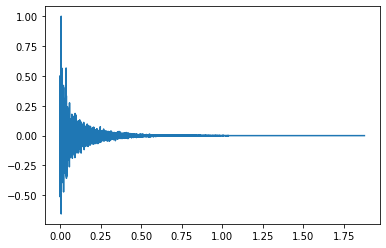

In [ ]:
import soundfile
import matplotlib.pyplot as plt 

"""
data_wav_norm, samplerate = soundfile.read(filename_in)
soundfile.write(filename_in, data_wav_norm, samplerate, subtype='PCM_16')

"""
fs_wav, data_wav = wavfile.read(filename_in)

data_wav_norm = data_wav / (2**15)

time_wav = np.arange(0, len(data_wav_norm)) / fs_wav
print("time wav: {}".format(time_wav))
"""
plotly.offline.iplot({ "data": [go.Scatter(x=time_wav, 
                                           y=data_wav_norm[:,0], 
                                           name='normalized audio signal')]})
"""
plt.plot(time_wav, data_wav_norm[:,1])
plt.show()

In [ ]:
!pip install sounddevice

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [ ]:
import sounddevice as sd

print('Gravando...\n')
"""
duration = len(data_wav_norm)/ fs_wav

print('Gravando...\n')

mic_data = sd.rec(
        int(fs_wav * duration), 
        samplerate = fs_wav,
        channels = 1, 
        blocking = True
    )
print('A gravação parou.\n')
soundfile.write(filename_mic, mic_data, fs_wav)
"""

OSError: ignored

time wav mic: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.81476190e+00
 2.81478458e+00 2.81480726e+00]


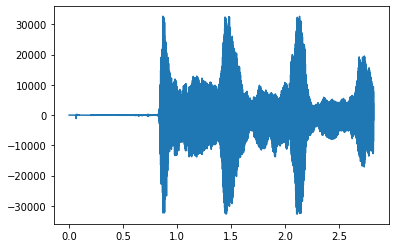

In [ ]:
fs_wav_mic, data_wav_mic = wavfile.read(filename_mic)
#data_wav_norm = data_wav / (2**15)
time_wav_mic = np.arange(0, len(data_wav_mic)) / fs_wav_mic
print('time wav mic: {}'.format(time_wav_mic))
plt.plot(time_wav_mic, data_wav_mic)
plt.show()

[0.         0.         0.02487183 ... 0.24978638 0.25869751 0.        ]


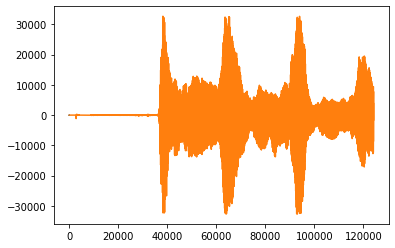

In [ ]:
import scipy.signal
#convolution = np.convolve(data_wav_norm[:,0], data_wav_mic, mode = 'full')
convolution = scipy.signal.convolve(data_wav_norm[:,0], data_wav_mic, mode = 'full', method = 'direct')
print(convolution)
soundfile.write('output_conv2.wav', convolution, fs_wav_mic)
plt.plot(time_wav, data_wav_norm[:,0], data_wav_mic)
plt.show()